In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from scipy.stats import f_oneway, chi2_contingency
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [68]:
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

In [69]:
df = pd.read_csv("data/data.csv")

In [110]:
len(df)

2111

In [70]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [71]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [72]:
column_names = {
    "family_history_with_overweight": "family_history",
    "FAVC": "high_cal",
    "FCVC": "vegetables",
    "NCP": "num_meals",
    "CAEC": "food_bw_meals",
    "SMOKE": "smoke",
    "CH2O": "water_amount",
    "SCC": "monitor_cal",
    "FAF": "phy_activity_freq",
    "TUE": "tech_freq",
    "CALC": "alcohol_freq",
    "MTRANS": "transportation",
    "NObeyesdad": "obesity_level"
}

df.rename(columns=column_names, inplace=True)

In [73]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'high_cal',
       'vegetables', 'num_meals', 'food_bw_meals', 'smoke', 'water_amount',
       'monitor_cal', 'phy_activity_freq', 'tech_freq', 'alcohol_freq',
       'transportation', 'obesity_level'],
      dtype='object')

In [74]:
df.isna().sum()

Gender               0
Age                  0
Height               0
Weight               0
family_history       0
high_cal             0
vegetables           0
num_meals            0
food_bw_meals        0
smoke                0
water_amount         0
monitor_cal          0
phy_activity_freq    0
tech_freq            0
alcohol_freq         0
transportation       0
obesity_level        0
dtype: int64

In [75]:
df["BMI"] = df["Weight"]/(df["Height"]**2)

In [76]:
df.describe()

,Age,Height,Weight,vegetables,num_meals,water_amount,phy_activity_freq,tech_freq,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,29.700159
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,8.011337
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998685
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,24.325802
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,28.719089
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,36.016501
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.811753


In [77]:
df["obesity_level"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [78]:
obesity_counts = df["obesity_level"].value_counts().sort_index()
df_obesity_counts = obesity_counts.reset_index()
df_obesity_counts.columns = ["Obesity Level", "Number of People"]
df_obesity_counts

,Obesity Level,Number of People
0,Insufficient_Weight,272
1,Normal_Weight,287
2,Obesity_Type_I,351
3,Obesity_Type_II,297
4,Obesity_Type_III,324
5,Overweight_Level_I,290
6,Overweight_Level_II,290


In [79]:
ordered_levels = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III",
]

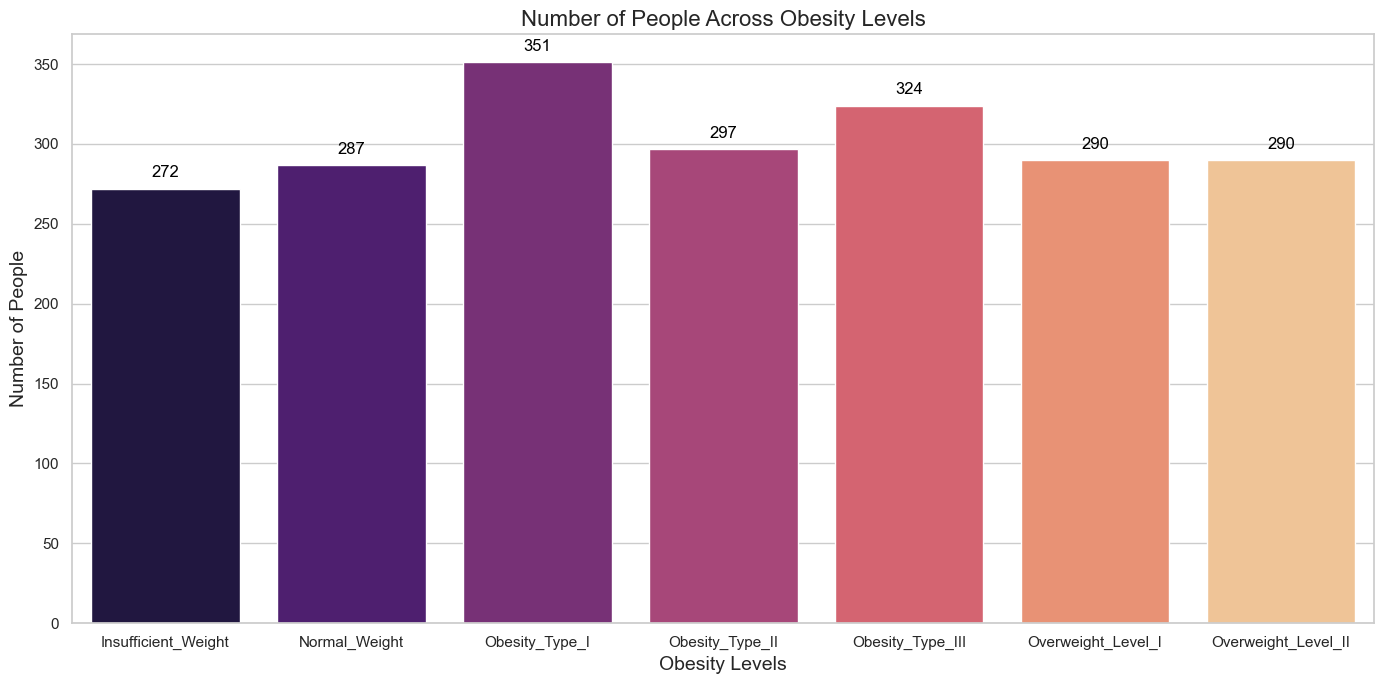

In [80]:
plt.figure(figsize=(14, 7))
sns.barplot(data=df_obesity_counts, x="Obesity Level", y="Number of People", palette="magma")
plt.title("Number of People Across Obesity Levels", fontsize=16)
plt.xlabel("Obesity Levels", fontsize=14)
plt.ylabel("Number of People", fontsize=14)
plt.xticks(rotation=0, ha="center")

for index, row in df_obesity_counts.iterrows():
    plt.text(index, row["Number of People"] + 7, f"{row["Number of People"]:,}", 
             color="black", ha="center", fontsize=12)

plt.tight_layout()
plt.show()

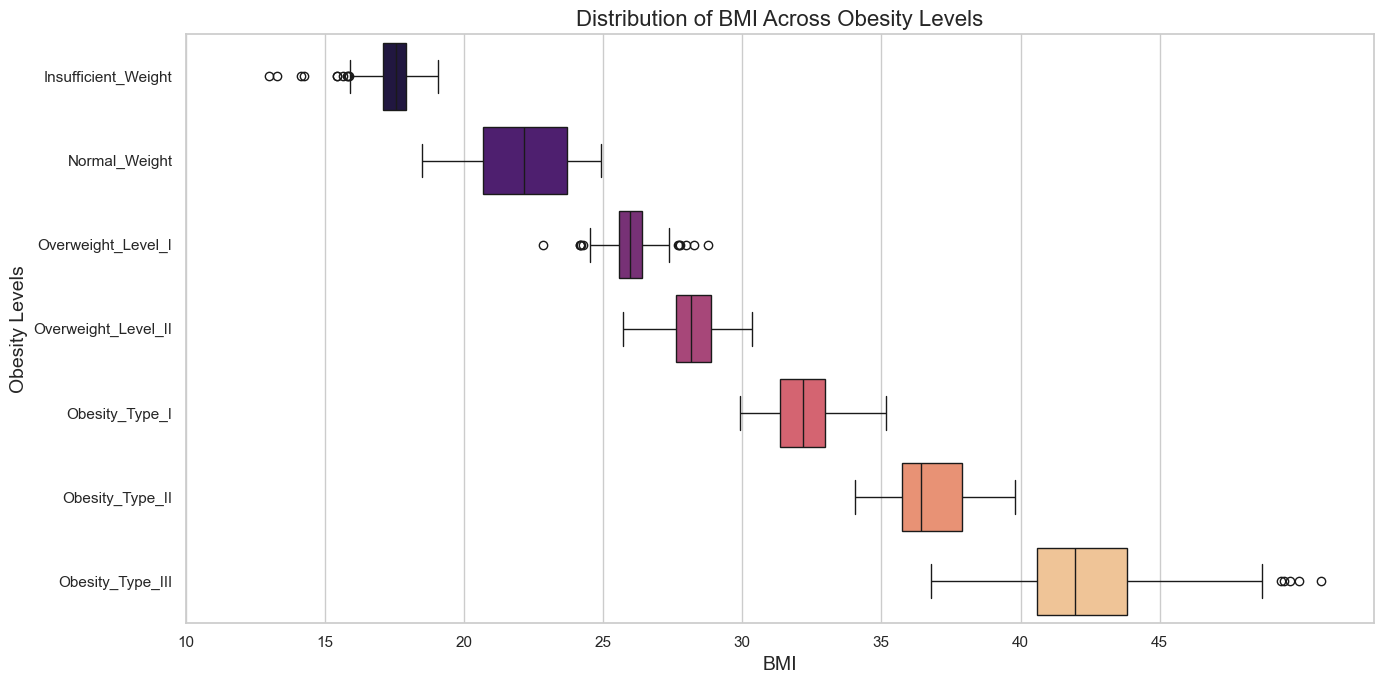

In [81]:
plt.figure(figsize=(14, 7))
sns.boxplot(x="BMI", y="obesity_level", data=df, orient="h", palette="magma", order=ordered_levels)
plt.title("Distribution of BMI Across Obesity Levels", fontsize=16)
plt.xlabel("BMI", fontsize=14)
plt.ylabel("Obesity Levels", fontsize=14)
plt.xticks(range(10, 50, 5), rotation=0, ha="center")
plt.tight_layout()
plt.show()

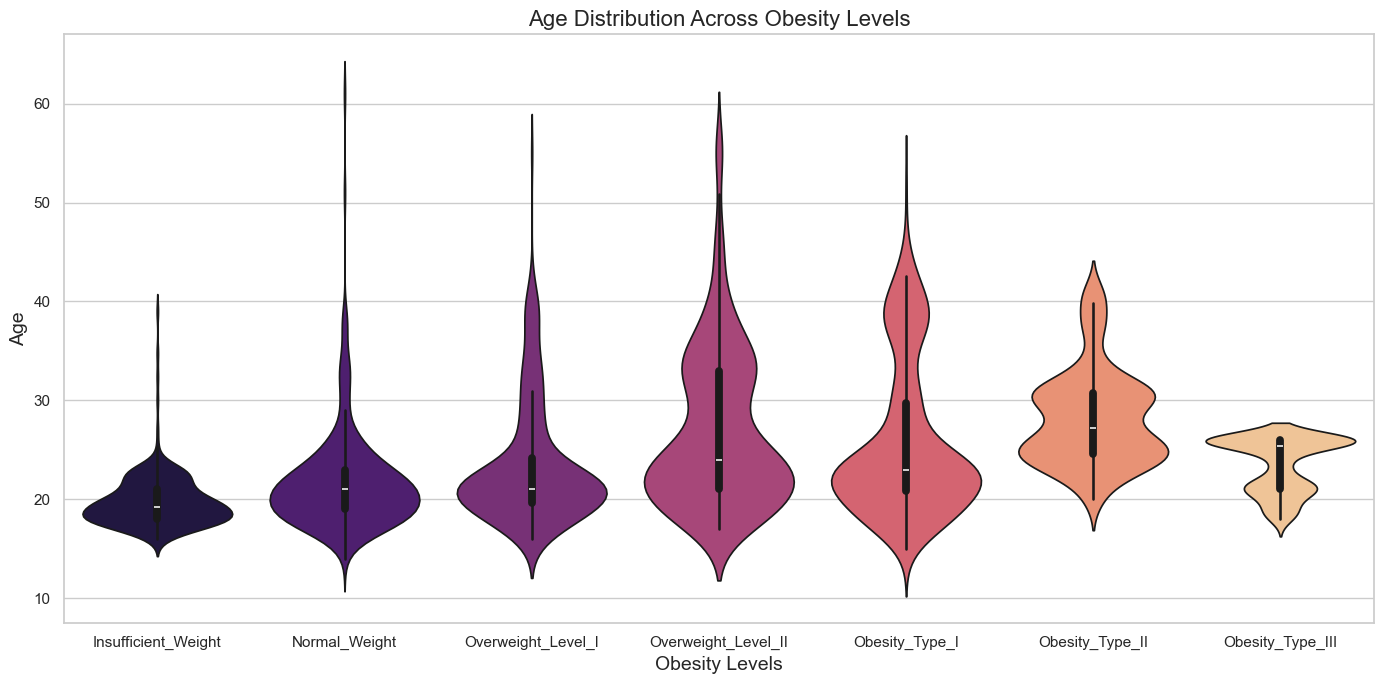

In [82]:
plt.figure(figsize=(14, 7))
sns.violinplot(x="obesity_level", y="Age", data=df, palette="magma", order=ordered_levels)
plt.title("Age Distribution Across Obesity Levels", fontsize=16)
plt.xlabel("Obesity Levels", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.xticks(rotation=0, ha="center")
plt.tight_layout()
plt.show()

In [83]:
df["family_history"].value_counts()

family_history
yes    1726
no      385
Name: count, dtype: int64

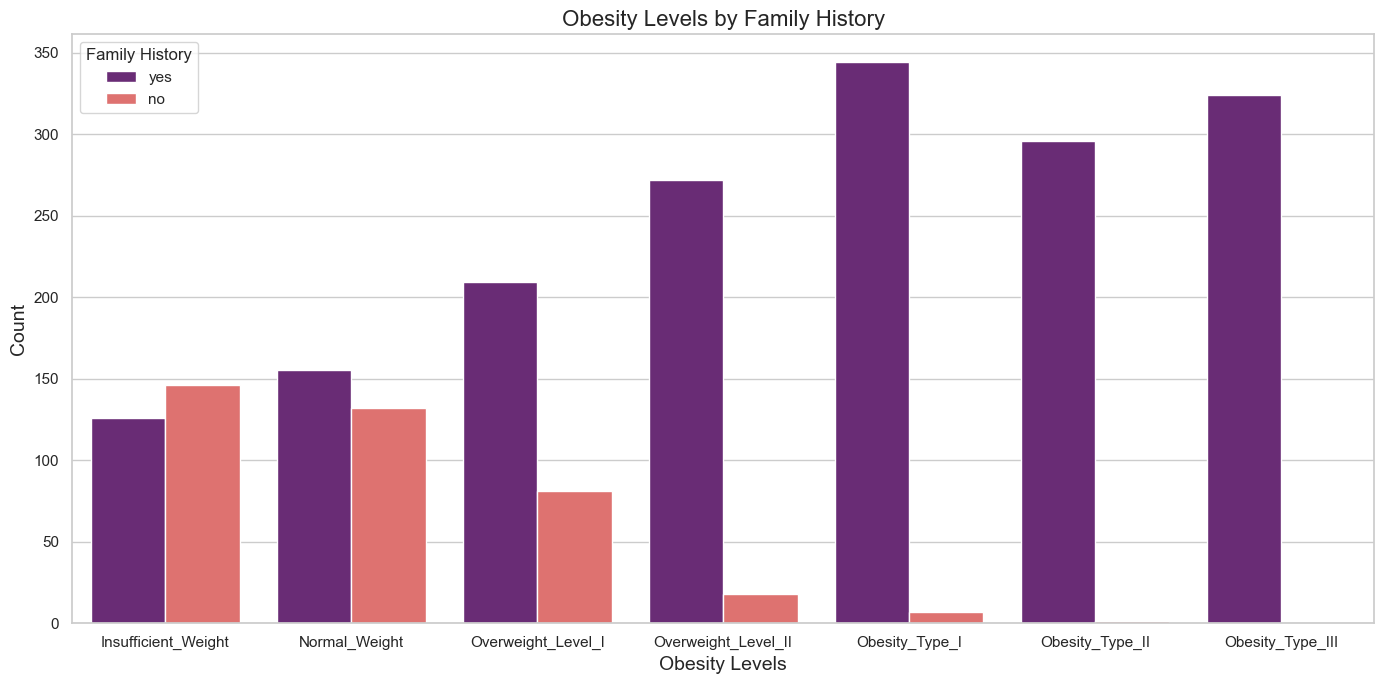

In [84]:
plt.figure(figsize=(14, 7))
sns.countplot(x="obesity_level", hue="family_history", data=df, palette="magma", order=ordered_levels)
plt.title("Obesity Levels by Family History", fontsize=16)
plt.xlabel("Obesity Levels", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0, ha="center")
plt.legend(title="Family History")
plt.tight_layout()
plt.show()

In [85]:
df["smoke"].value_counts()

smoke
no     2067
yes      44
Name: count, dtype: int64

In [86]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'high_cal',
       'vegetables', 'num_meals', 'food_bw_meals', 'smoke', 'water_amount',
       'monitor_cal', 'phy_activity_freq', 'tech_freq', 'alcohol_freq',
       'transportation', 'obesity_level', 'BMI'],
      dtype='object')

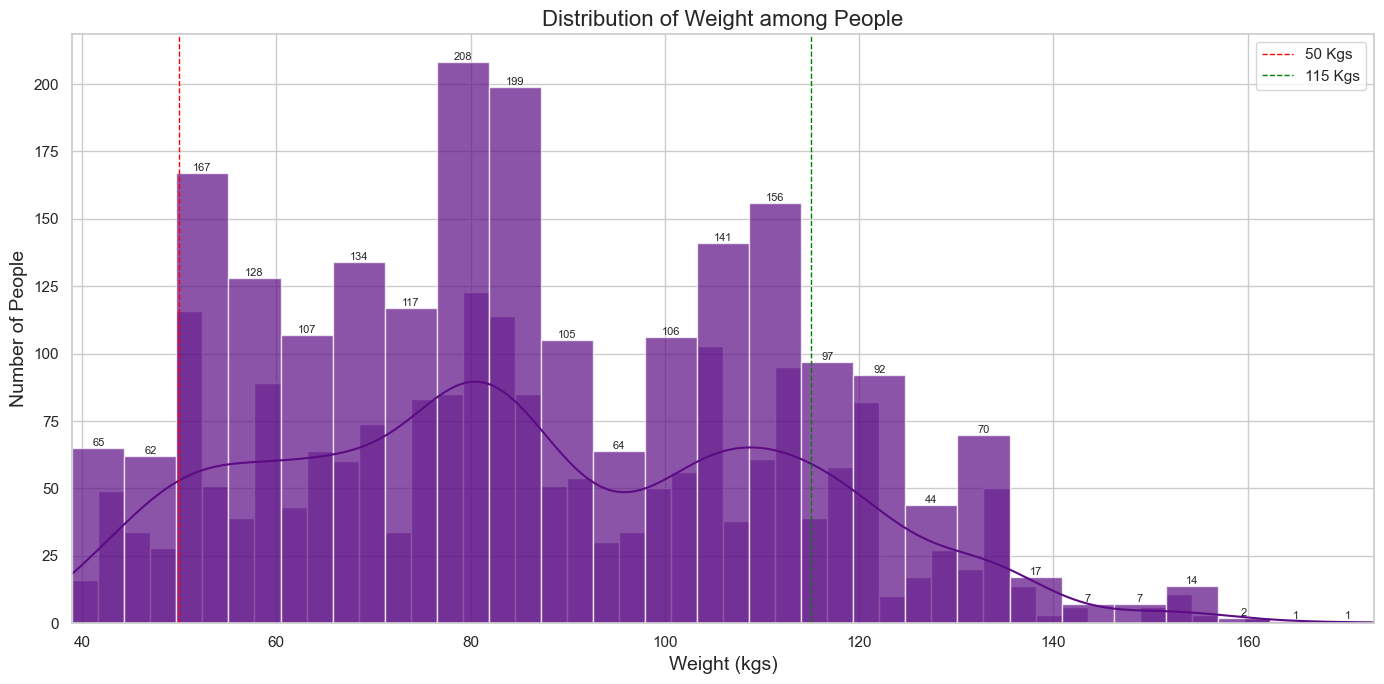

In [87]:
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x="Weight", bins=50, kde=True, color= "#5B0C84")
plt.axvline(50, color="red", linestyle="--", linewidth=1, label="50 Kgs")
plt.axvline(115, color="green", linestyle="--", linewidth=1, label="115 Kgs")
plt.title("Distribution of Weight among People", fontsize=16)
plt.xlabel("Weight (kgs)", fontsize=14)
plt.ylabel("Number of People", fontsize=14)
plt.legend()
plt.xlim(df["Weight"].min(), df["Weight"].max())

counts, bins, patches = plt.hist(df["Weight"], bins=25, color= "#5B0C84" , alpha=0.7)
for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count), ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

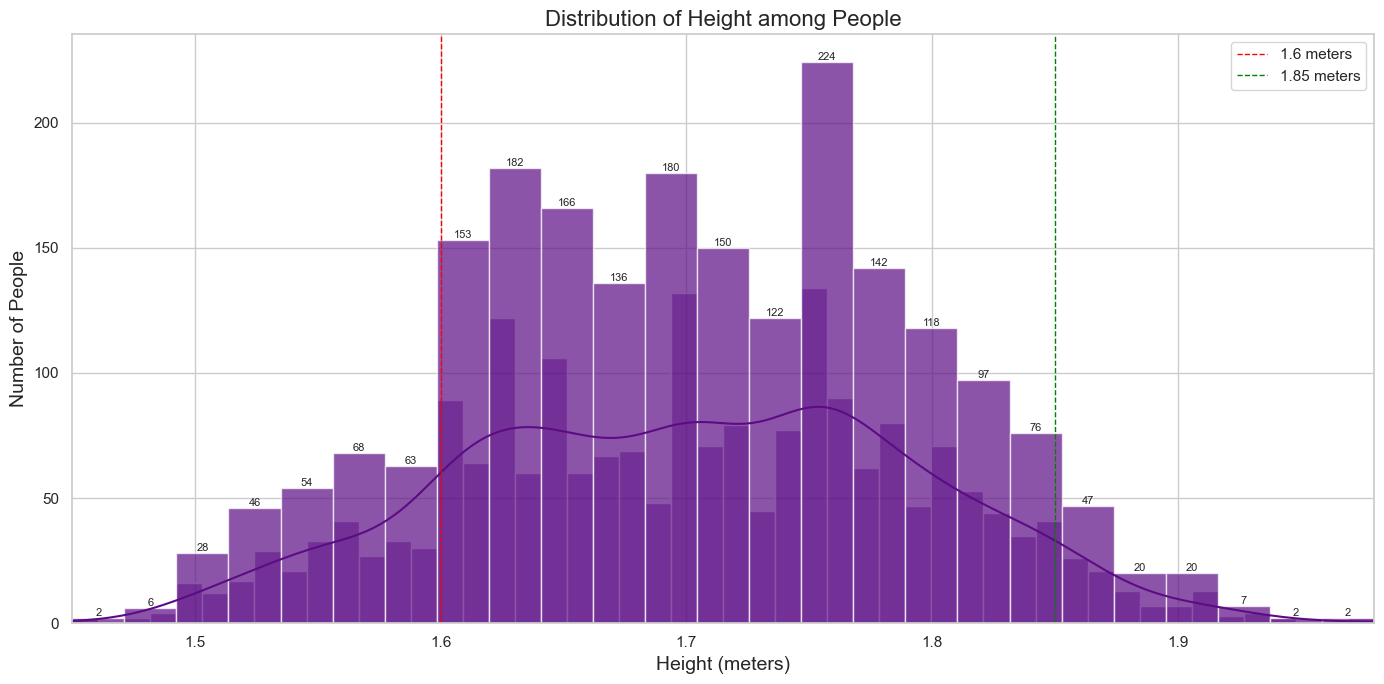

In [88]:
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x="Height", bins=50, kde=True, color= "#5B0C84")
plt.axvline(1.6, color="red", linestyle="--", linewidth=1, label="1.6 meters")
plt.axvline(1.85, color="green", linestyle="--", linewidth=1, label="1.85 meters")
plt.title("Distribution of Height among People", fontsize=16)
plt.xlabel("Height (meters)", fontsize=14)
plt.ylabel("Number of People", fontsize=14)
plt.legend()
plt.xlim(df["Height"].min(), df["Height"].max())

counts, bins, patches = plt.hist(df["Height"], bins=25, color= "#5B0C84" , alpha=0.7)
for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count), ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

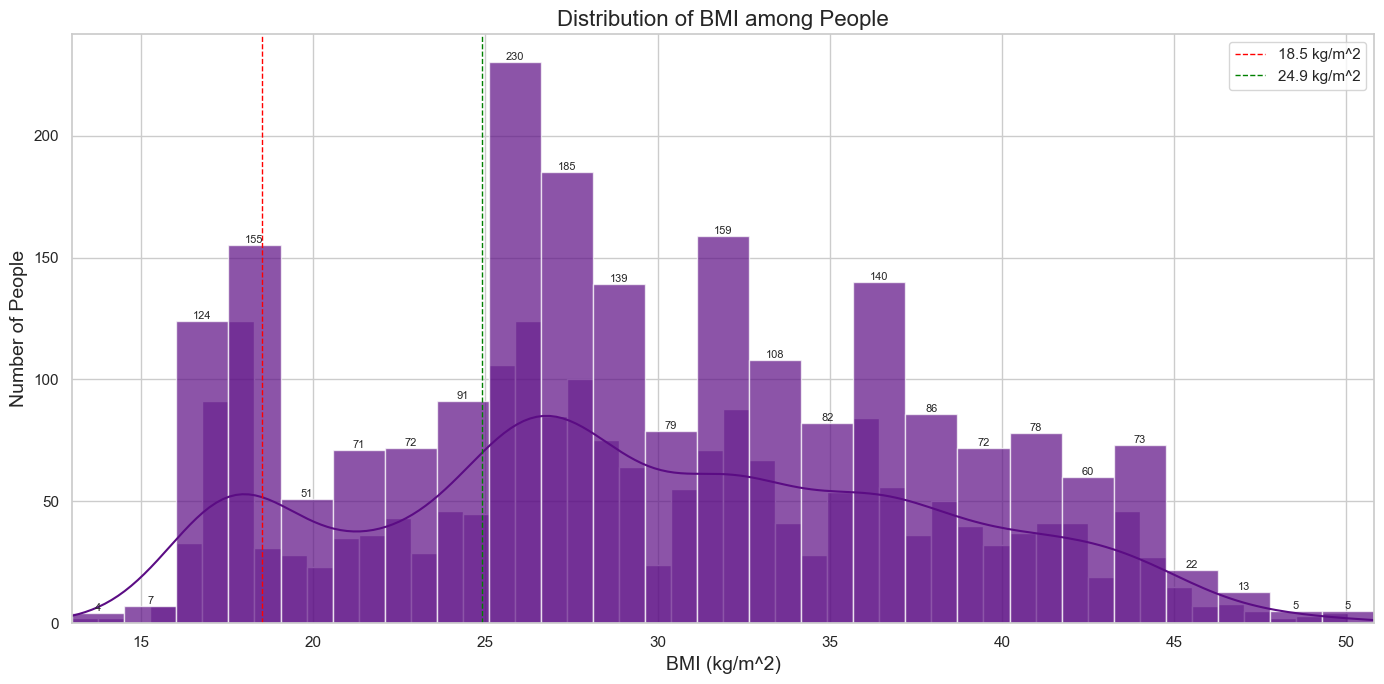

In [89]:
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x="BMI", bins=50, kde=True, color= "#5B0C84")
plt.axvline(18.5, color="red", linestyle="--", linewidth=1, label="18.5 kg/m^2")
plt.axvline(24.9, color="green", linestyle="--", linewidth=1, label="24.9 kg/m^2")
plt.title("Distribution of BMI among People", fontsize=16)
plt.xlabel("BMI (kg/m^2)", fontsize=14)
plt.ylabel("Number of People", fontsize=14)
plt.legend()
plt.xlim(df["BMI"].min(), df["BMI"].max())

counts, bins, patches = plt.hist(df["BMI"], bins=25, color= "#5B0C84" , alpha=0.7)
for count, patch in zip(counts, patches):
    if count > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, count, int(count), ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

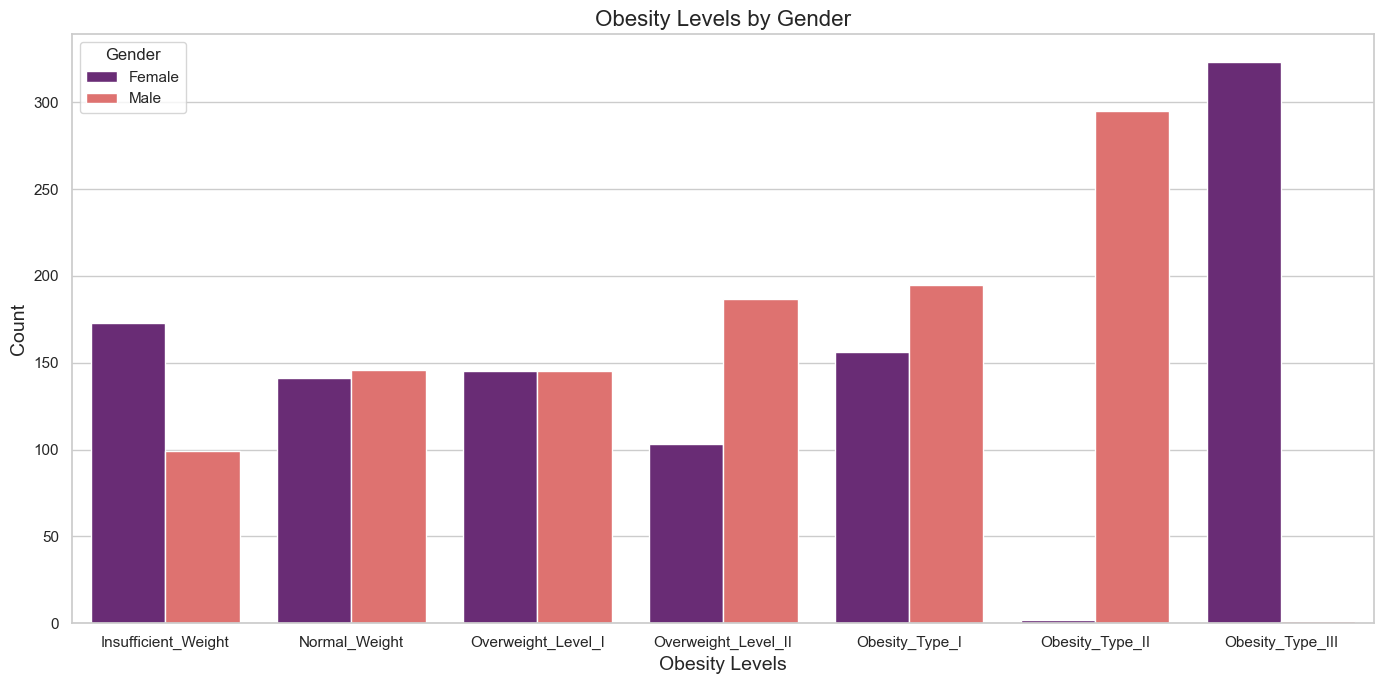

In [90]:
plt.figure(figsize=(14, 7))
sns.countplot(x="obesity_level", hue="Gender", data=df, palette="magma", order=ordered_levels)
plt.title("Obesity Levels by Gender", fontsize=16)
plt.xlabel("Obesity Levels", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0, ha="center")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [91]:
column_names

{'family_history_with_overweight': 'family_history',
 'FAVC': 'high_cal',
 'FCVC': 'vegetables',
 'NCP': 'num_meals',
 'CAEC': 'food_bw_meals',
 'SMOKE': 'smoke',
 'CH2O': 'water_amount',
 'SCC': 'monitor_cal',
 'FAF': 'phy_activity_freq',
 'TUE': 'tech_freq',
 'CALC': 'alcohol_freq',
 'MTRANS': 'transportation',
 'NObeyesdad': 'obesity_level'}

In [92]:
groups = [group["phy_activity_freq"].dropna() for _, group in df.groupby("obesity_level")]

f_stat, p_value = f_oneway(*groups)
print(f"ANOVA Test Results: F-statistic = {f_stat}, p-value = {p_value}")

if p_value < 0.05:
    print("Significant differences exist in physical activity across obesity levels.")
else:
    print("No significant differences in physical activity across obesity levels.")

ANOVA Test Results: F-statistic = 17.4842004293805, p-value = 7.653252995698972e-20
Significant differences exist in physical activity across obesity levels.


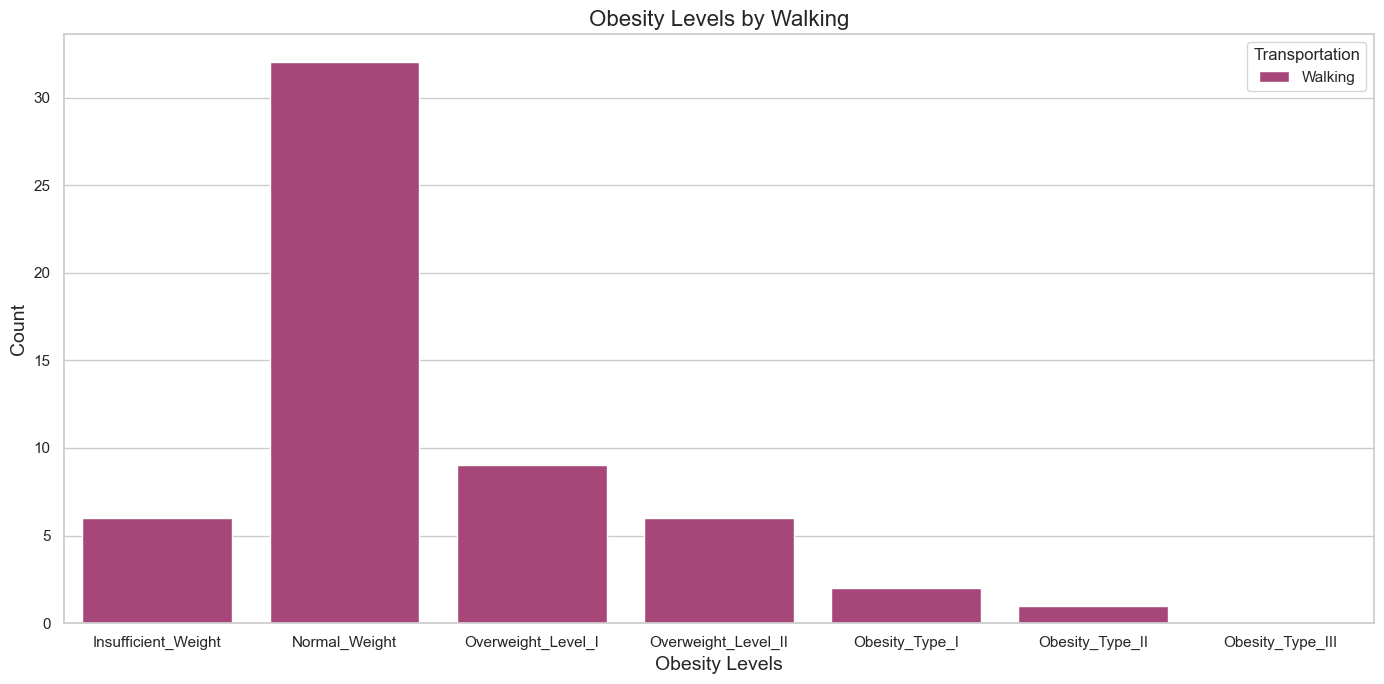

In [112]:
plt.figure(figsize=(14, 7))
sns.countplot(x="obesity_level", hue="transportation", data=df[df["transportation"] == "Walking"], palette="magma", order=ordered_levels)
plt.title("Obesity Levels by Walking", fontsize=16)
plt.xlabel("Obesity Levels", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0, ha="center")
plt.legend(title="Transportation")
plt.tight_layout()
plt.show()

In [94]:
# Create a contingency table
contingency_table = pd.crosstab(df["transportation"], df["obesity_level"])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test Results: Chi2-statistic = {chi2_stat}, p-value = {p_value}, Degrees of Freedom = {dof}")

if p_value < 0.05:
    print("Significant association exists between transportation mode and obesity levels.")
else:
    print("No significant association between transportation mode and obesity levels.")

Chi-Square Test Results: Chi2-statistic = 292.59394813167995, p-value = 5.177915203835779e-48, Degrees of Freedom = 24
Significant association exists between transportation mode and obesity levels.


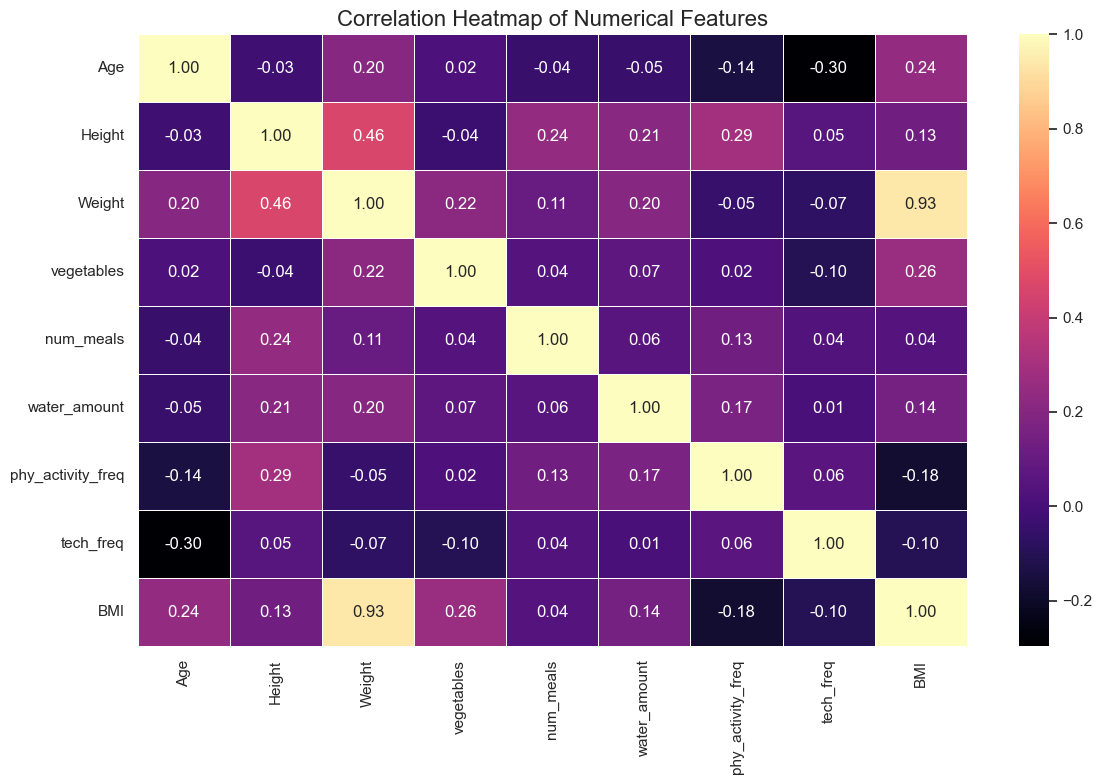

In [95]:
plt.figure(figsize=(12, 8))

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(
    correlation_matrix,
    annot=True,  
    cmap='magma',  
    fmt='.2f',  
    linewidths=0.5,
)

plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             2111 non-null   object 
 1   Age                2111 non-null   float64
 2   Height             2111 non-null   float64
 3   Weight             2111 non-null   float64
 4   family_history     2111 non-null   object 
 5   high_cal           2111 non-null   object 
 6   vegetables         2111 non-null   float64
 7   num_meals          2111 non-null   float64
 8   food_bw_meals      2111 non-null   object 
 9   smoke              2111 non-null   object 
 10  water_amount       2111 non-null   float64
 11  monitor_cal        2111 non-null   object 
 12  phy_activity_freq  2111 non-null   float64
 13  tech_freq          2111 non-null   float64
 14  alcohol_freq       2111 non-null   object 
 15  transportation     2111 non-null   object 
 16  obesity_level      2111 

In [113]:
feature_df = df.drop(["Height", "Weight", "smoke"], axis=1)

In [114]:
numeric_cols = ["Age", "BMI", "vegetables", "num_meals", "water_amount", "phy_activity_freq", "tech_freq"]
scaler = StandardScaler()
feature_df[numeric_cols] = scaler.fit_transform(feature_df[numeric_cols])

In [115]:
column_names

{'family_history_with_overweight': 'family_history',
 'FAVC': 'high_cal',
 'FCVC': 'vegetables',
 'NCP': 'num_meals',
 'CAEC': 'food_bw_meals',
 'SMOKE': 'smoke',
 'CH2O': 'water_amount',
 'SCC': 'monitor_cal',
 'FAF': 'phy_activity_freq',
 'TUE': 'tech_freq',
 'CALC': 'alcohol_freq',
 'MTRANS': 'transportation',
 'NObeyesdad': 'obesity_level'}

In [116]:
categorical_cols = ["Gender", "family_history", "high_cal", "food_bw_meals", 
                    "monitor_cal", "alcohol_freq", "transportation", "obesity_level"]

for col in categorical_cols:
    feature_df[col] = LabelEncoder().fit_transform(feature_df[col])

In [117]:
X = feature_df.drop(["obesity_level"], axis=1)
y = feature_df["obesity_level"]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [119]:
models = {
    "Logistic Regression": LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
}

In [120]:
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    print(f"{model_name} - Accuracy: {accuracy:.4f}\n")

Training Logistic Regression...
Logistic Regression - Accuracy: 0.8913

Training Random Forest...
Random Forest - Accuracy: 0.9764

Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.9787

Training MLP Classifier...
MLP Classifier - Accuracy: 0.9693

